# MNIST

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

In [ ]:
! pip install keras tensorflow

https://www.tensorflow.org/tensorboard/get_started

## Setup

In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import datetime

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [10]:
! rm -rf ./logs/

## Prepare the data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test_num) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test_num, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


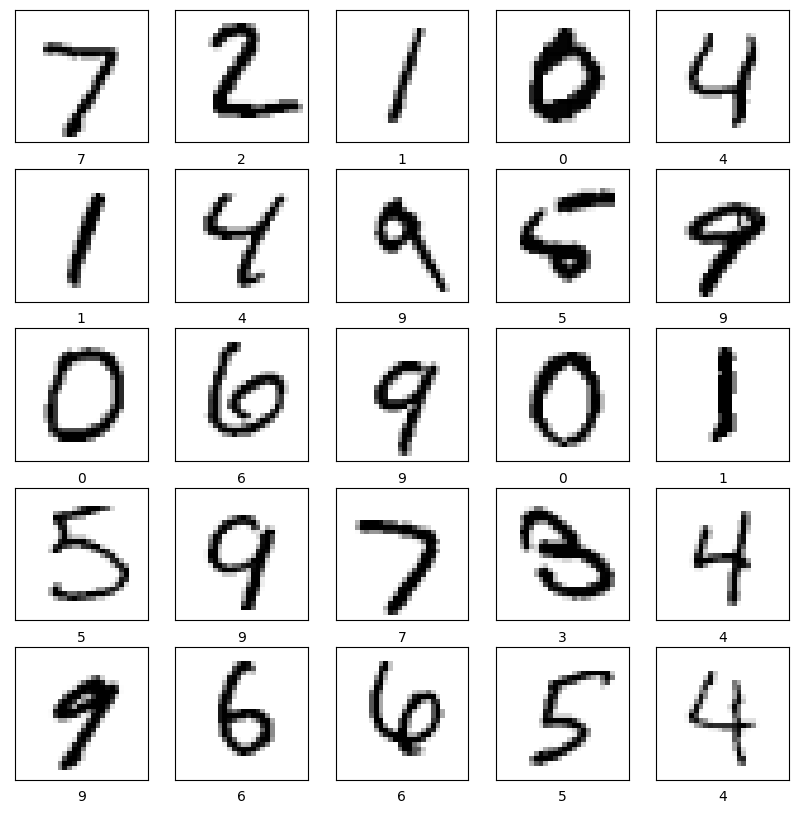

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary)
    plt.xlabel(y_test_num[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

## Build the model

In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        #layers.Dropout(0.9),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Train the model

In [13]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.2, 
          callbacks=[tensorboard_callback])

Epoch 1/10
375/375 [==============================] - 8s 20ms/step - loss: 0.2367 - accuracy: 0.9308 - val_loss: 0.0760 - val_accuracy: 0.9779
Epoch 2/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0638 - accuracy: 0.9804 - val_loss: 0.0591 - val_accuracy: 0.9820
Epoch 3/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0442 - accuracy: 0.9867 - val_loss: 0.0484 - val_accuracy: 0.9868
Epoch 4/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0418 - val_accuracy: 0.9883
Epoch 5/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0426 - val_accuracy: 0.9881
Epoch 6/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0407 - val_accuracy: 0.9880
Epoch 7/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0373 - val_accuracy: 0.9897

In [14]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9056), started 2:42:24 ago. (Use '!kill 9056' to kill it.)

## Evaluate the trained model

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.031343795359134674
Test accuracy: 0.9909999966621399
